In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/okcupid_profiles.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [10]:
df = df.drop(df.index[df['height'].isna()])     # 결측치 3개 제거
df = df.drop(df.index[df['height'] < 30])       # 이상치 7개 제거 : 30inch = 76.2cm

In [11]:
df['drugs'] = df['drugs'].fillna('never')

In [12]:
# 마지막 온라인 시간 - 시간 삭제
df["last_online"] = pd.to_datetime(df["last_online"].str[:10], format="%Y-%m-%d")

In [13]:
# age 이상치 제거 (70세 이상) 
df = df[df["age"].between(18, 70)].copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59934 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          59934 non-null  int64         
 1   status       59934 non-null  object        
 2   sex          59934 non-null  object        
 3   orientation  59934 non-null  object        
 4   body_type    54646 non-null  object        
 5   diet         35547 non-null  object        
 6   drinks       56954 non-null  object        
 7   drugs        59934 non-null  object        
 8   education    53310 non-null  object        
 9   ethnicity    54259 non-null  object        
 10  height       59934 non-null  float64       
 11  income       59934 non-null  int64         
 12  job          51739 non-null  object        
 13  last_online  59934 non-null  datetime64[ns]
 14  location     59934 non-null  object        
 15  offspring    24382 non-null  object        
 16  pets     

In [15]:
ref_date = df['last_online'].max()
print(f"데이터셋 기준일 (가장 최근 접속일): {ref_date}")

데이터셋 기준일 (가장 최근 접속일): 2012-07-01 00:00:00


In [16]:
df['is_churned'] = (ref_date - df['last_online']).dt.days >= 14
df['is_churned'] = df['is_churned'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59934 entries, 0 to 59945
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          59934 non-null  int64         
 1   status       59934 non-null  object        
 2   sex          59934 non-null  object        
 3   orientation  59934 non-null  object        
 4   body_type    54646 non-null  object        
 5   diet         35547 non-null  object        
 6   drinks       56954 non-null  object        
 7   drugs        59934 non-null  object        
 8   education    53310 non-null  object        
 9   ethnicity    54259 non-null  object        
 10  height       59934 non-null  float64       
 11  income       59934 non-null  int64         
 12  job          51739 non-null  object        
 13  last_online  59934 non-null  datetime64[ns]
 14  location     59934 non-null  object        
 15  offspring    24382 non-null  object        
 16  pets     

<Axes: xlabel='is_churned', ylabel='count'>

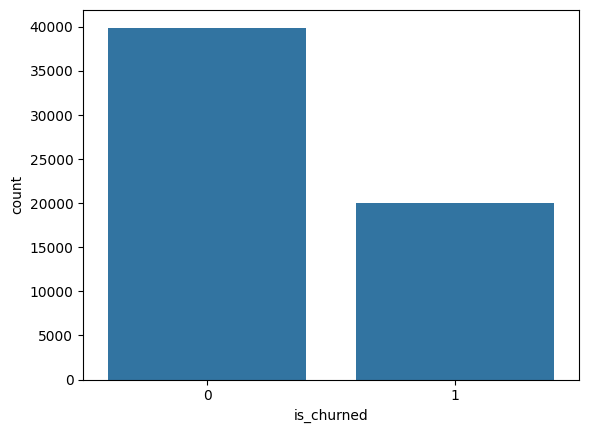

In [18]:
sns.countplot(x="is_churned", data=df)

<Axes: xlabel='age', ylabel='Density'>

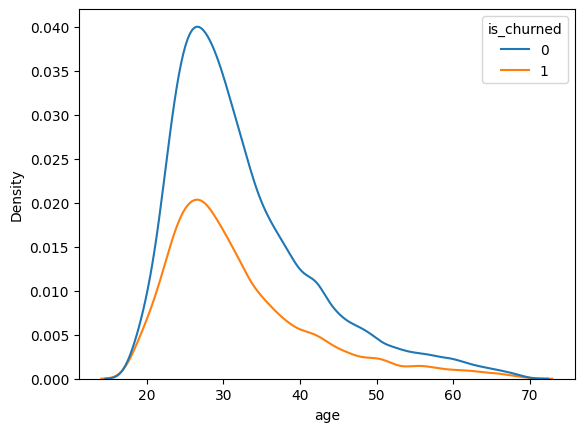

In [19]:
sns.kdeplot(data=df, x="age", hue="is_churned")

<Axes: xlabel='income', ylabel='Density'>

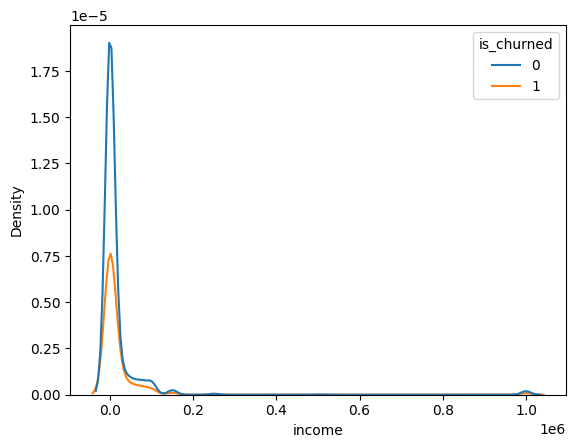

In [20]:
# sns.boxplot(x="is_churned", y="income", data=df)

sns.kdeplot(data=df, x="income", hue="is_churned")

In [21]:
df["age_group"] = (df["age"] // 10) * 10
df["age_group"] = df["age_group"].astype(str) + "대"

C:\Users\guswl\AppData\Local\Temp\ipykernel_17140\3566111744.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["is_churned"].mean().plot(kind="bar")


<Axes: xlabel='age_group'>

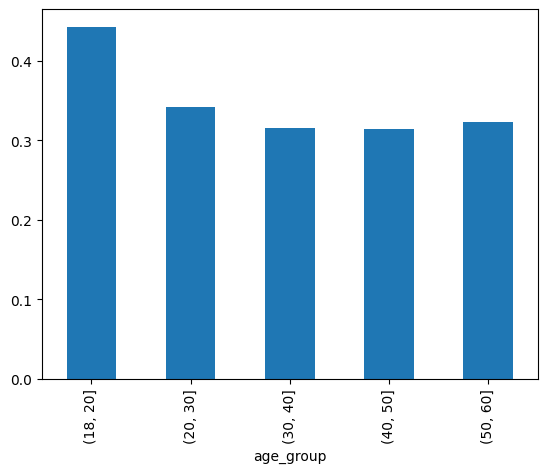

In [22]:
df["age_group"] = pd.cut(df["age"], bins=[18,20,30,40,50,60])
df.groupby("age_group")["is_churned"].mean().plot(kind="bar")

<Axes: xlabel='height', ylabel='Density'>

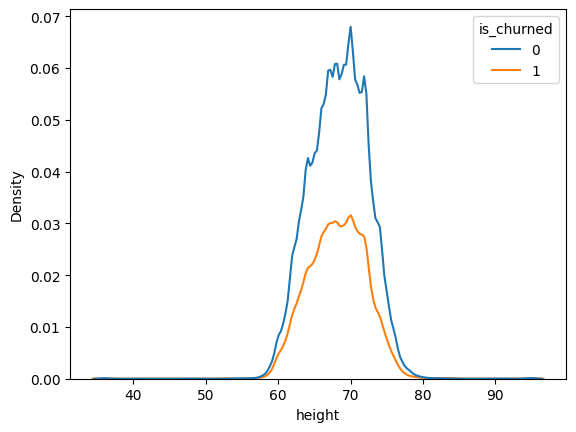

In [23]:
sns.kdeplot(data=df, x="height", hue="is_churned")

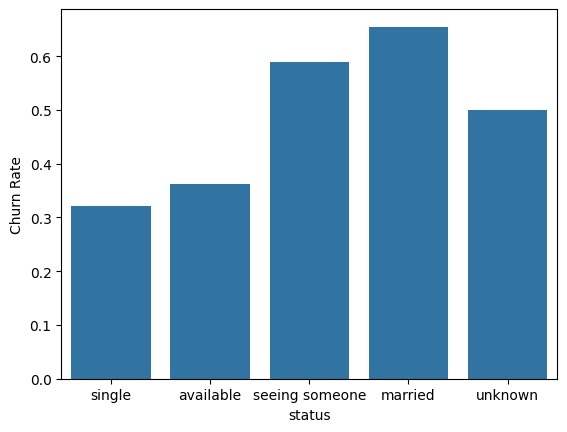

In [24]:
import seaborn as sns

sns.barplot(
    x="status",
    y="is_churned",
    data=df,
    estimator="mean",
    errorbar=None
)

plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Churn Rate')

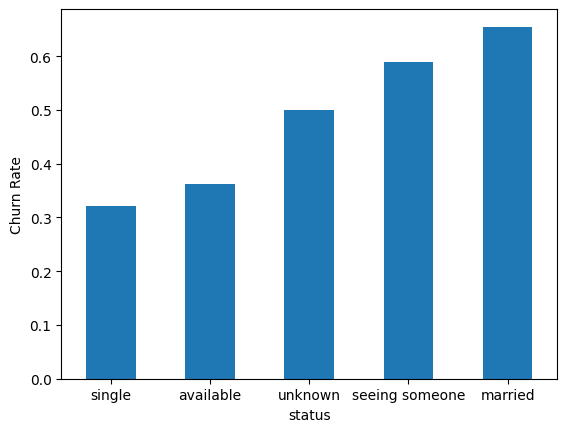

In [25]:
# status별 이탈률
df.groupby("status")["is_churned"].mean().sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Churn Rate")

<Axes: xlabel='essay_len', ylabel='Density'>

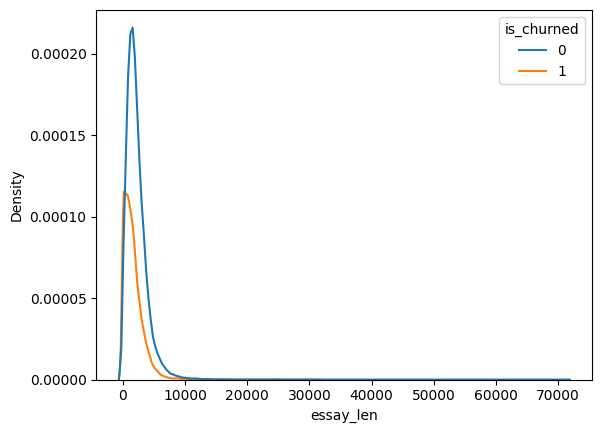

In [26]:
df["essay_len"] = df[[f"essay{i}" for i in range(10)]].fillna("").apply(lambda x: sum(len(str(v)) for v in x), axis=1)

# sns.boxplot(x="is_churned", y="essay_len", data=df)
sns.kdeplot(data=df, x="essay_len", hue="is_churned")

<Axes: xlabel='essay_count', ylabel='Density'>

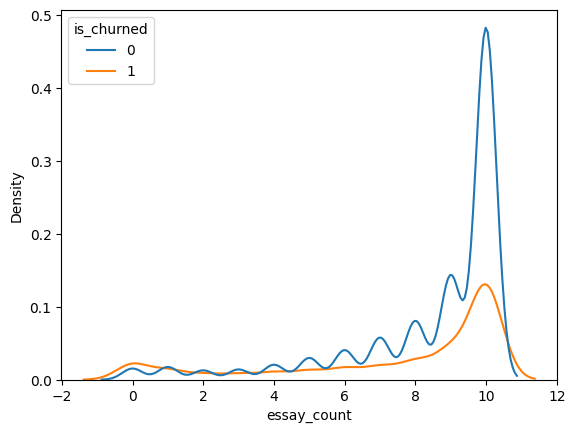

In [27]:
df["essay_count"] = df[[f"essay{i}" for i in range(10)]].notnull().sum(axis=1)

# sns.boxplot(x="is_churned", y="essay_count", data=df)
sns.kdeplot(data=df, x="essay_count", hue="is_churned")
# sns.histplot(data=df, x="essay_count", hue="is_churned", bins=20, element="step", stat="density")
# sns.stripplot(x="is_churned", y="essay_count", data=df, jitter=True, alpha=0.3)

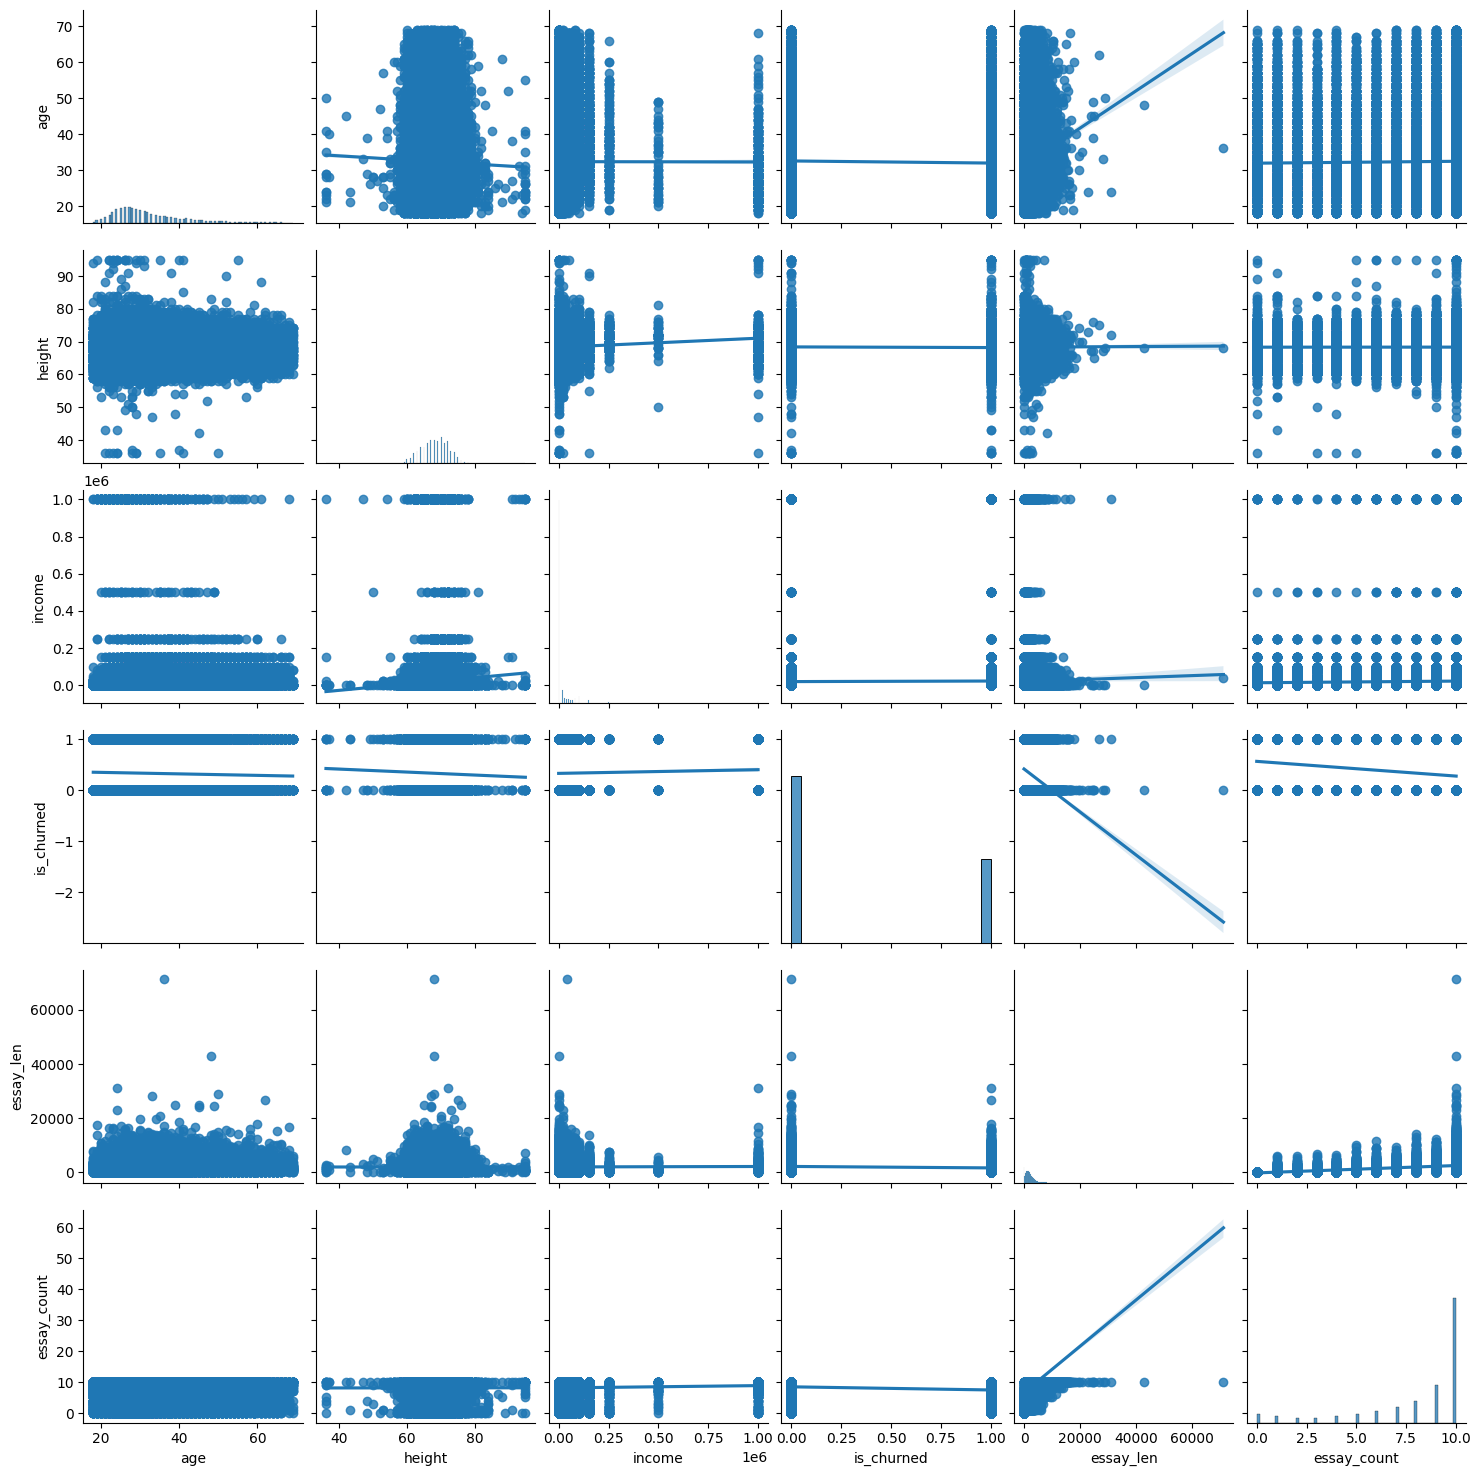

In [31]:
sns.pairplot(df, kind="reg")

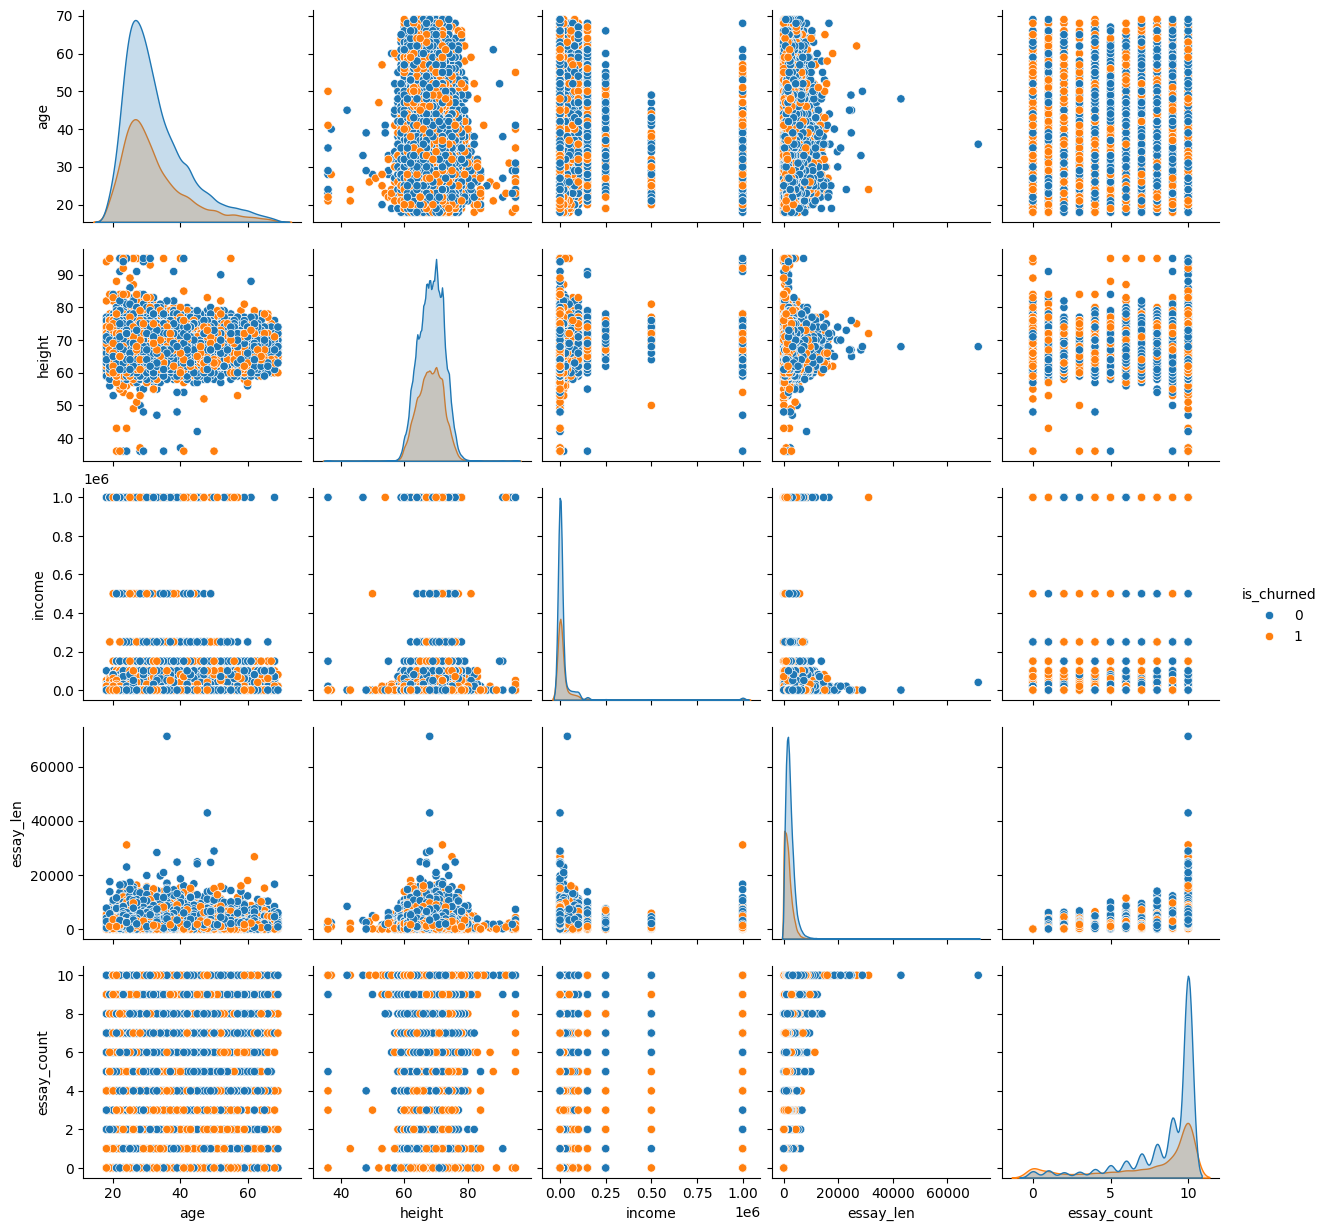

In [29]:
sns.pairplot(df, hue='is_churned')